In [2]:
from qiskit import *
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import QuantumCircuit
from qiskit import transpile

# 1. Define your circuit/algorithm

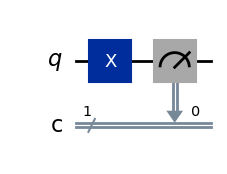

In [3]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.measure(0,0)
qc.draw('mpl')

# 2. Run locally on simulator

In [4]:
backend = BasicSimulator()

In [5]:
job = backend.run(qc)

In [6]:
counts = job.result().get_counts()

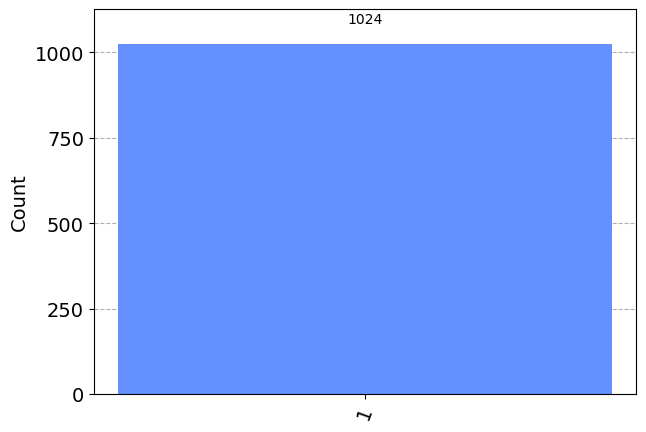

In [7]:
plot_histogram(counts)

# 3. Transpile

In [7]:
# If you did not previously save your credentials, use the following line instead:
# service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
# You can obtain the token from quantum.ibm.com

In [8]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

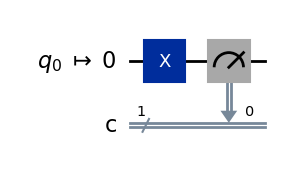

In [9]:
transpiled_qc = transpile(qc, backend)
transpiled_qc.draw('mpl', idle_wires=False)

In [10]:
#Few backend properties:
print(backend.name)
print(backend.num_qubits)
print(backend.operations)

ibm_sherbrooke
127
[Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), Instruction(name='rz', num_qubits=1, num_clbits=0, params=[Parameter(λ)]), Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]), Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), Instruction(name='ecr', num_qubits=2, num_clbits=0, params=[]), Instruction(name='reset', num_qubits=1, num_clbits=0, params=[]), Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), Delay(duration=t[unit=dt])]


## Exercise
Create the following circuits called 'Bell state', transpile it and check how it looks after transpilation:\
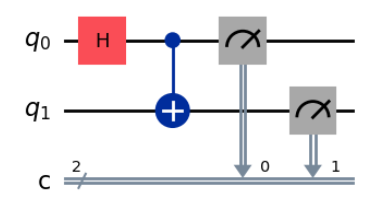

# 4. Run on real Quantum Computer in the cloud

In [21]:
sampler = Sampler(backend)
sampler.options.resilience_level = 1
sampler.options.default_shots = 5000

In [22]:
job = sampler.run([transpiled_qc])

In [11]:
id = job.job_id()
print(id, "\n", job.status(),"\n")

2c00e70b-b4f7-4d4b-8fc3-0e55d2dc05bf 
 JobStatus.DONE 



Run the above cell untill the JobStatus says 'DONE' ;)\
Only then your job is run and results are available.\
Note that this may take even up to few hours in extreme situations of long queues - the same backends are used by the whole world with billions of circuits run every day! 

In [16]:
#Below code shows how to obtain job results at any time in future having Id of the job.
#job = service.job('cs5nezkyhpyg008at490')

In [13]:
result = job.result()
counts = result.quasi_dists[0]

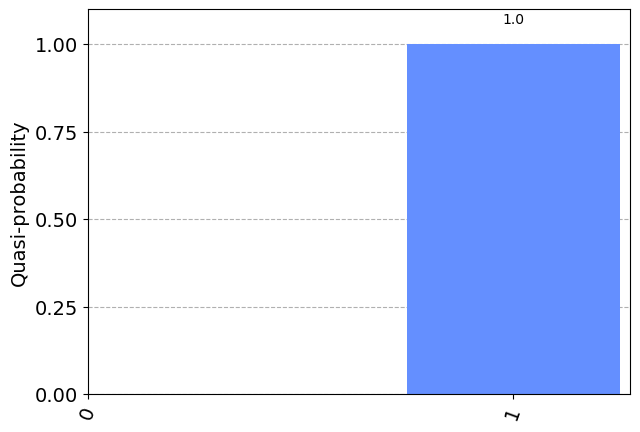

In [14]:
plot_histogram(counts)

## Exercise
- Write qiskit circuit resulting in quantum state being a superposition of two basis states which are represented by binary ASCII codes of your initials.
- Run on simulator to check if the circuit is proper.
- Run on real Quantum COmputer in the cloud as indicated above and compare the results.

Most likely you will observe some differences - which show the 'noise' in the current NISQ (Noise Intermediate Scane Quantum) computers.
There are lots of ways to mitigate the noise/errors and it has been proven (in [THIS](https://www.nature.com/articles/s41586-023-06096-3) famous Nature paper) that even with such noise computers a meaningful results can be obtained which are beyond capabilities of today's clasical computers.